In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("jobs_in_data.csv")

In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
df.shape

(9355, 12)

# Data Cleaning

In [5]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

drop duplicates

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(5341, 12)

In [8]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [9]:
df["work_year"].value_counts()

2023    3980
2022    1095
2021     195
2020      71
Name: work_year, dtype: int64

In [10]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [11]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [12]:
df = df.dropna(axis=0, how='any')

In [13]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [14]:
df.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


# Exploratory Data Analysis

In [15]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [16]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

<AxesSubplot:>

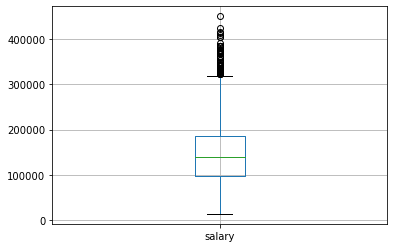

In [17]:
df.boxplot(column="salary",by=None,ax=None)

(array([ 42.,  47., 112., 169., 185., 241., 244., 278., 261., 292., 324.,
        337., 339., 327., 280., 275., 254., 192., 240., 149., 137., 108.,
         81., 100.,  65.,  49.,  46.,  31.,  45.,  16.,  14.,  17.,   6.,
          8.,   4.,  11.,   7.,   1.,   2.,   3.,   1.,   0.,   1.]),
 array([ 14000.        ,  24139.53488372,  34279.06976744,  44418.60465116,
         54558.13953488,  64697.6744186 ,  74837.20930233,  84976.74418605,
         95116.27906977, 105255.81395349, 115395.34883721, 125534.88372093,
        135674.41860465, 145813.95348837, 155953.48837209, 166093.02325581,
        176232.55813953, 186372.09302326, 196511.62790698, 206651.1627907 ,
        216790.69767442, 226930.23255814, 237069.76744186, 247209.30232558,
        257348.8372093 , 267488.37209302, 277627.90697674, 287767.44186047,
        297906.97674419, 308046.51162791, 318186.04651163, 328325.58139535,
        338465.11627907, 348604.65116279, 358744.18604651, 368883.72093023,
        379023.25581395,

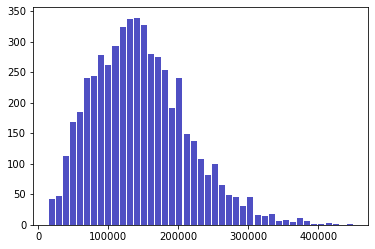

In [18]:
plt.hist(x=df["salary"],bins='auto',color='#0504aa',alpha=0.7,rwidth=0.85)

<AxesSubplot:ylabel='Density'>

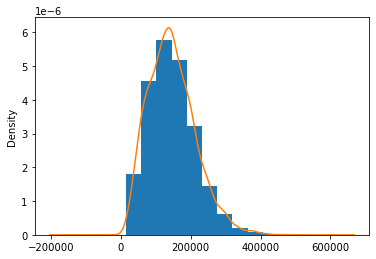

In [19]:
ax = df["salary"].plot.hist(density=True,)
df["salary"].plot.density(ax=ax)

In [20]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [21]:
df["salary_currency"].value_counts()

USD    4707
EUR     282
GBP     276
CAD      37
AUD      11
PLN       7
SGD       6
CHF       5
BRL       4
TRY       3
DKK       3
Name: salary_currency, dtype: int64

Text(0, 0.5, 'Salary')

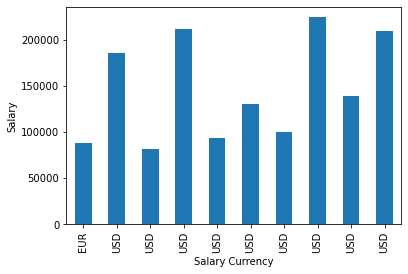

In [22]:
ax = df.iloc[:10,:].plot.bar(x="salary_currency",y="salary",legend=False)
ax.set_xlabel('Salary Currency')
ax.set_ylabel('Salary')

<AxesSubplot:xlabel='salary_currency', ylabel='salary'>

<Figure size 864x1296 with 0 Axes>

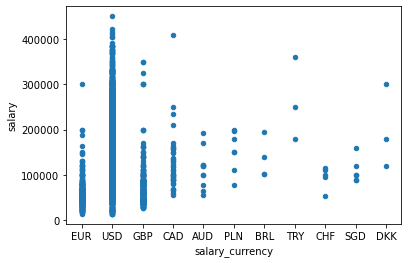

In [23]:
plt.figure(figsize=(12,18))
df.plot.scatter(x="salary_currency",y="salary")

<AxesSubplot:>

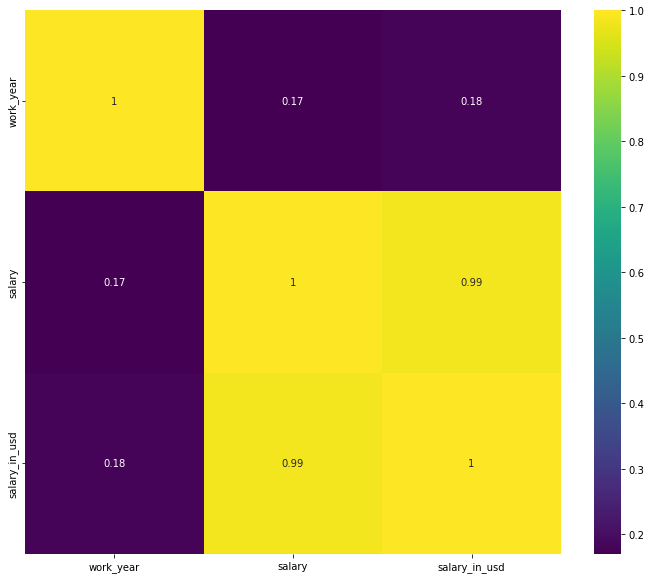

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="viridis",annot=True)

In [26]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


<AxesSubplot:xlabel='company_size', ylabel='count'>

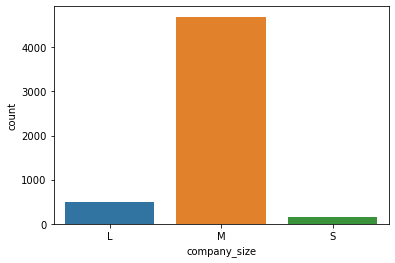

In [27]:
sns.countplot(x='company_size',data=df)

In [28]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


We want to predict the size of the company in wich an employee works so we will apply some modification
as below :
* we will assign Large company with 1,
* small medium company with 2,
* large company with 3.

In [29]:
df['company_size'] = df['company_size'].replace(['L','M','S'], [1, 2 ,3])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 671.5+ KB


In [31]:
df["work_year"].value_counts()

2023    3980
2022    1095
2021     195
2020      71
Name: work_year, dtype: int64

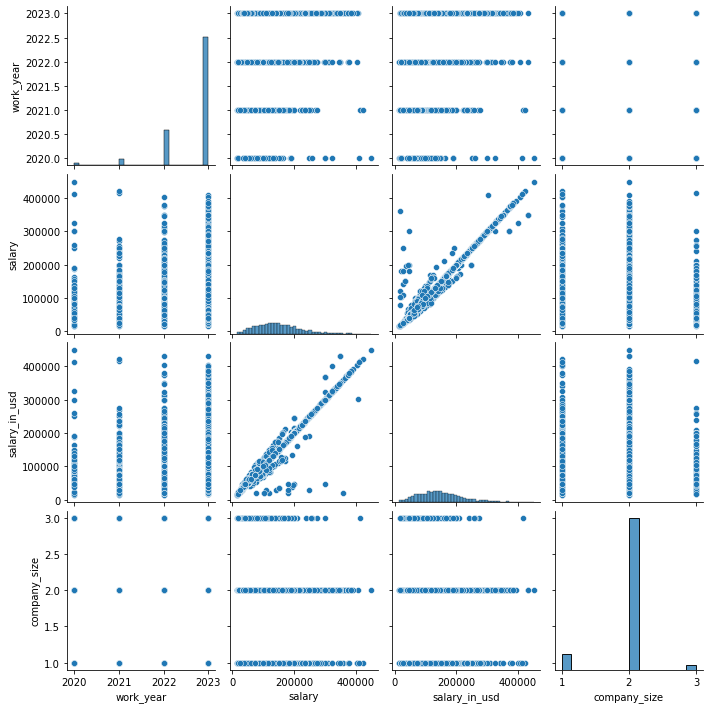

In [32]:
sns.pairplot(df)

In [33]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,1
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,2
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,2
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,2
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,2


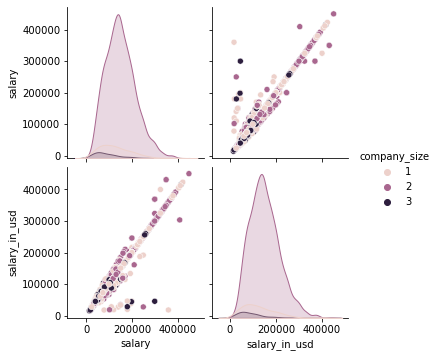

In [34]:
sns.pairplot(df[['salary','salary_in_usd','company_size']],hue='company_size')

In [35]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [36]:
cols=['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size']

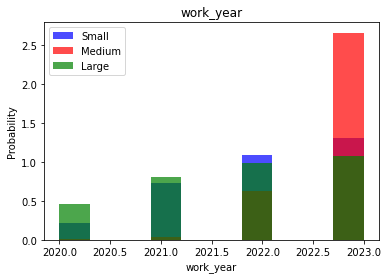

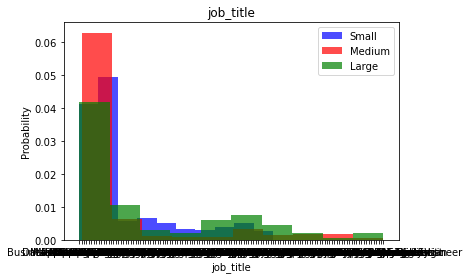

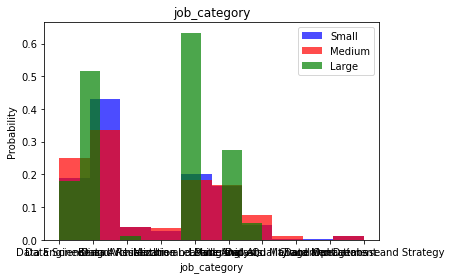

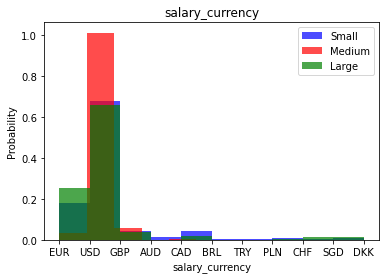

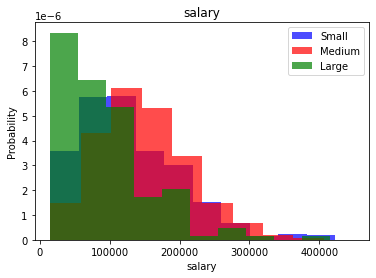

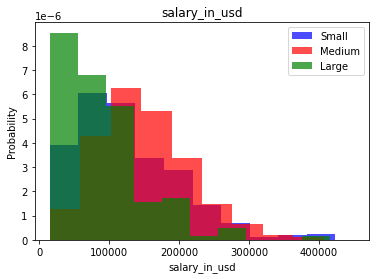

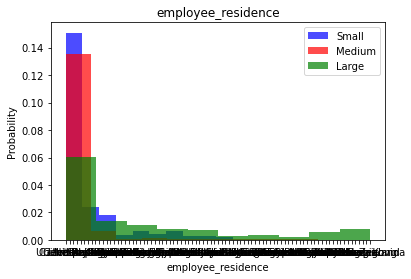

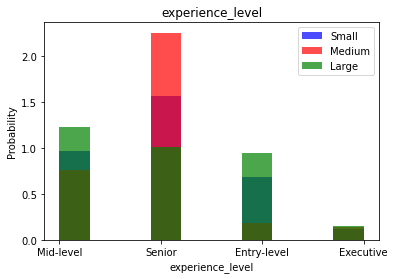

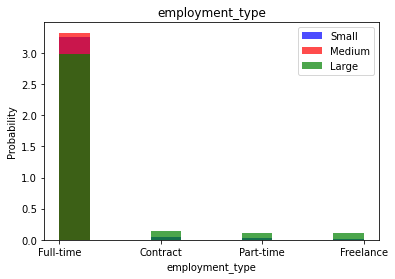

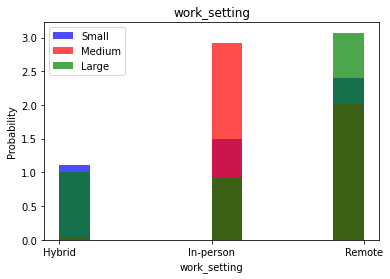

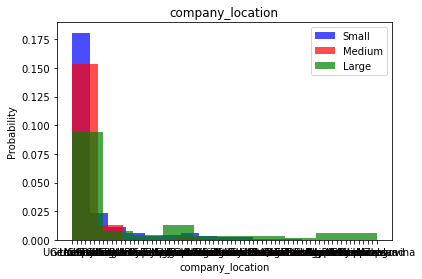

In [37]:
for label in cols[:-1]:
    plt.hist(df[df['company_size']==1][label],color='blue',label='Small',
             alpha=0.7,density=True)
    plt.hist(df[df['company_size']==2][label],color='red',label='Medium',
             alpha=0.7,density=True)
    plt.hist(df[df['company_size']==3][label],color='green',label='Large',
             alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Machine Learning Model

In [38]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size           int64
dtype: object

In [50]:
X = df[['work_year','salary','salary_in_usd','company_size']]  # Features
y = df['company_size']  # Target variable

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report 

KNN

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn_model.predict(X_test)

In [55]:
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [56]:
y_test

5878    2
2891    2
9350    1
7771    2
179     2
       ..
786     2
8570    3
7309    2
1883    1
125     2
Name: company_size, Length: 1069, dtype: int64

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      0.23      0.33        99
           2       0.91      0.98      0.94       943
           3       0.50      0.11      0.18        27

    accuracy                           0.89      1069
   macro avg       0.66      0.44      0.49      1069
weighted avg       0.87      0.89      0.87      1069



Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [61]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        99
           2       0.88      1.00      0.94       943
           3       0.00      0.00      0.00        27

    accuracy                           0.88      1069
   macro avg       0.29      0.33      0.31      1069
weighted avg       0.78      0.88      0.83      1069



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [64]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.03      0.06        99
           2       0.88      1.00      0.94       943
           3       0.00      0.00      0.00        27

    accuracy                           0.88      1069
   macro avg       0.49      0.34      0.33      1069
weighted avg       0.84      0.88      0.83      1069



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine (SVM)

In [65]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [66]:
y_predict = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.03      0.06        99
           2       0.88      1.00      0.94       943
           3       0.00      0.00      0.00        27

    accuracy                           0.88      1069
   macro avg       0.49      0.34      0.33      1069
weighted avg       0.84      0.88      0.83      1069



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#Accuracy :
#SVM --> 0.88
#Logistic Regression --> 0.88
#Naive Bayes --> 0.88
#KNN --> 0.89
#It seems like KNN is the best model